# Piecewise Linear Interpolation

![image.png](https://optimization.cbe.cornell.edu/images/thumb/9/93/Numerical_example.jpg/680px-Numerical_example.jpg)

<small>Source: Google Images - Optimization Cornell</small>


## Introduction

Piecewise linear interpolation is a method used to approximate a function $f(x)$ by connecting known data points with linear segments. Given a set of points:

$$
(x_0, f(x_0)), (x_1, f(x_1)), \dots, (x_N, f(x_N))
$$

where $ x_0 < x_1 < \dots < x_N$

the goal is to construct an interpolating function $\tilde{f}(x)$ such that:

$$
\tilde{f}(x_i) = f(x_i), \quad \text{for all } i = 0, 1, \dots, N
$$

$$
\tilde{f}(x) \text{ is linear between consecutive points } (x_i, f(x_i)) \text{ and } (x_{i+1}, f(x_{i+1}))
$$

## Formula

For each interval $ [x_i, x_{i+1}] $, the interpolating function is given by:

$$
\tilde{f}(x) = f(x_i) + \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} (x - x_i), \quad x \in [x_i, x_{i+1}]
$$

This ensures continuity but not necessarily smoothness.

## Applications

Piecewise linear interpolation is widely used in:

- Numerical approximation of functions.
- Graphics rendering (polygonal approximations).
- Signal processing for sampling and reconstruction.
- Engineering simulations requiring fast interpolations.



## Error Norms


$$
\| f(x) - \tilde{f}(x) \|_{\infty} = \sup_{0 \leq x \leq 1} | f(x) - \tilde{f}(x) |
$$

$$
\| f(x) - \tilde{f}(x) \|_{1} = \int_{0}^{1} | f(x) - \tilde{f}(x) | dx
$$

$$
\text{Error} \sim O\left(\frac{1}{N^2}\right)
$$

---

This method provides a simple yet effective way to approximate functions when higher-order polynomials are impractical.


Max error: 0.12211502402382468


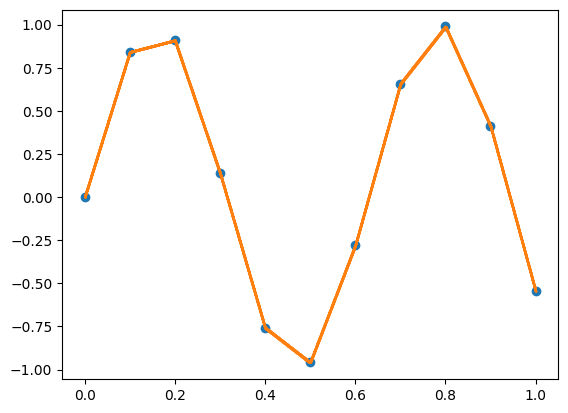

In [ ]:
from pylab import *

xp = linspace(0, 1, 11)
yp = sin(xp * 10)
plot(xp, yp, 'o')

x = linspace(0, 1, 10001)
y = interp(x, xp, yp)
plot(x, y, '.', ms=1)

yExact = sin(x * 10)
print('Max error:', max(abs(y - yExact)))
show()

# Error Analysis

For a given interpolation point, the error is defined as:

$$
\text{error} = f(x_0 + \delta x) - \tilde{f}(x_0 + \delta x)
$$

## Expansion of $f(x_0 + \delta x)$

Using a Taylor series expansion around $x_0$:

$$
f(x_0 + \delta x) = f(x_0) + \delta x f'(x_0) + \frac{\delta x^2}{2} f''(x_0) + O(\delta x^3)
$$

## Piecewise Linear Approximation

For linear interpolation between $x_0$ and $x_0 + \Delta x$, we express:

$$
\tilde{f}(x_0 + \delta x) = f(x_0) + \left(\frac{\delta x}{\Delta x} \right) (f(x_0 + \Delta x) - f(x_0))
$$

Expanding $f(x_0 + \Delta x)$ using Taylor series:

$$
f(x_0 + \Delta x) = f(x_0) + \Delta x f'(x_0) + \frac{\Delta x^2}{2} f''(x_0) + O(\Delta x^3)
$$

## Error Calculation

Subtracting the piecewise interpolation formula from the Taylor expansion:

$$
\text{error} = \frac{\delta x^2}{2} f''(x_0) - \frac{\Delta x \cdot \delta x}{2} f''(x_0) + O(\delta x^3)
$$

Since the dominant term is proportional to $\Delta x^2$, we conclude:

$$
\text{error} = O(\Delta x^2)
$$

This shows that the interpolation error decreases quadratically with smaller interval sizes.



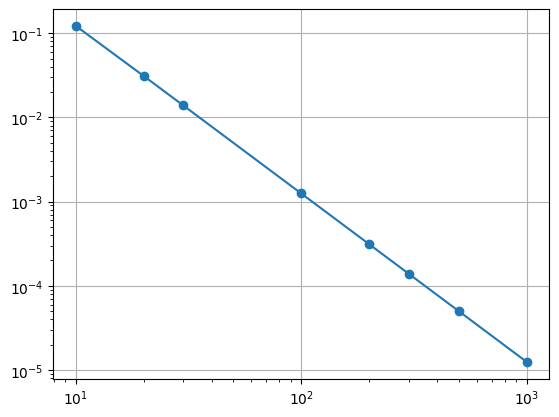

In [ ]:
from pylab import *

seriesOfNs = [10, 20, 30, 100, 200, 300, 500, 1000]
maxError = []
for N in seriesOfNs:
    xp = linspace(0, 1, N+1)
    yp = sin(xp * 10)

    x = linspace(0, 1, 10001)
    y = interp(x, xp, yp)

    yExact = sin(x * 10)
    maxError.append(max(abs(y - yExact)))

loglog(seriesOfNs, maxError, 'o-')
grid()
show()

# Higher Order Polynomial Approximation

Polynomial interpolation is a method for estimating an unknown function $f(x)$ using a polynomial $p(x)$ that passes through a given set of data points. Given $n+1$ points:

$$
(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)
$$

we seek a polynomial of degree at most $n$:

$$
p(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n
$$

such that:

$$
p(x_i) = y_i, \quad \text{for all } i = 0,1, \dots, n.
$$

To determine the coefficients $a_0, a_1, \dots, a_n$, we solve the following system:

$$
\begin{bmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n \\
1 & x_1 & x_1^2 & \dots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^n
\end{bmatrix}
\begin{bmatrix}
a_0 \\ a_1 \\ \vdots \\ a_n
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\ y_1 \\ \vdots \\ y_n
\end{bmatrix}
$$

In this case, since we have 4 points, we can try fitting a 3rd-order polynomial to the data.


[  0.          -3.94281331  13.47059631 -10.07180411]
Max error: 1.326885719705472


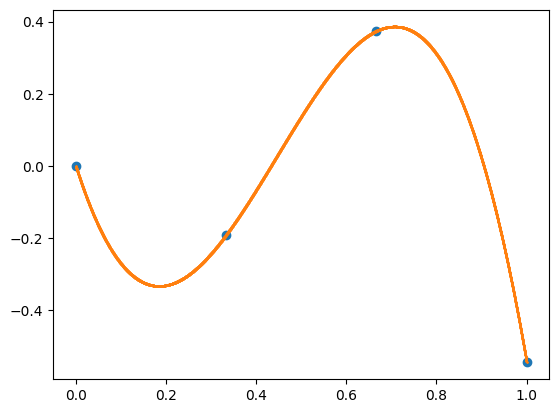

In [ ]:
from pylab import *

xp = linspace(0, 1, 4)
yp = sin(xp * 10)
plot(xp, yp, 'o')

x = linspace(0, 1, 10001)

A = transpose([xp**k for k in range(4)])
b = yp
a = linalg.solve(A, b)
print(a)
y = a[0] + a[1] * x + a[2] * x**2 + a[3] * x**3

plot(x, y, '.', ms=1)

yExact = sin(x * 10)
print('Max error:', max(abs(y - yExact)))
show()